<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       134 non-null    int64  
 1   y       134 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.2 KB
None
                x            y
count  134.000000   134.000000
mean    48.402985   562.947514
std     27.677281   276.664851
min      1.000000    41.379217
25%     26.250000   332.179740
50%     49.500000   557.762312
75%     71.000000   780.630518
max     99.000000  1104.802842


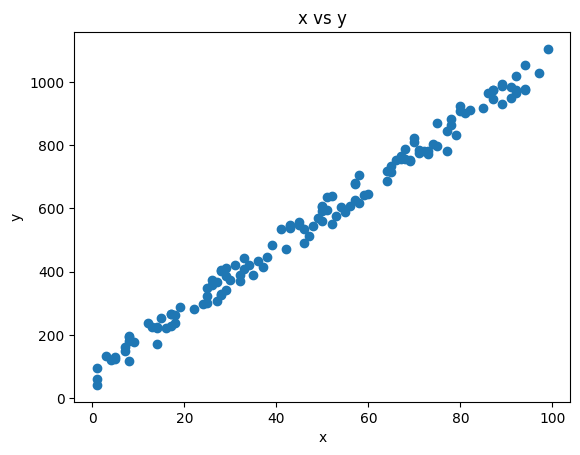

Mean Squared Error: 788.284494876922
R² Score: 0.9905036911127626
Predicted value: [133.73250108]


C:\Users\Richard\AppData\Local\Temp\ipykernel_26524\1668287254.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
d:\ml\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [4]:
# Step 1: Business Understanding (already defined as solving a linear regression problem)

# Step 2: Data Understanding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your data (replace 'data.csv' with your actual data file)
data = pd.read_csv('./dataset/mydata.csv')

# Brief summary of the data
print(data.info())
print(data.describe())

# Visualize the relationship (assume 'x' and 'y' are your feature and target)
plt.scatter(data['x'], data['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
plt.show()

# Step 3: Data Preparation
# Handle missing values if any (optional, depending on your dataset)
data.fillna(method='ffill', inplace=True)

# Split the data into features and target
X = data[['x']]  # Independent variable(s)
y = data['y']  # Dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Modeling
# Create a Linear Regression model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

# Step 5: Evaluation
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Step 6: Deployment (using the model for new predictions)
# Example of making predictions with new data
new_data = np.array([[5]])  # Replace with new data
predicted_value = model.predict(new_data)
print(f"Predicted value: {predicted_value}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X_column  100 non-null    float64
 1   y_column  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
         X_column    y_column
count  100.000000  100.000000
mean     4.105155   29.744744
std      2.719817   17.229921
min      0.037497  -12.044728
25%      1.755740   15.565839
50%      3.992549   29.778174
75%      6.355604   44.044786
max      9.520275   70.146564


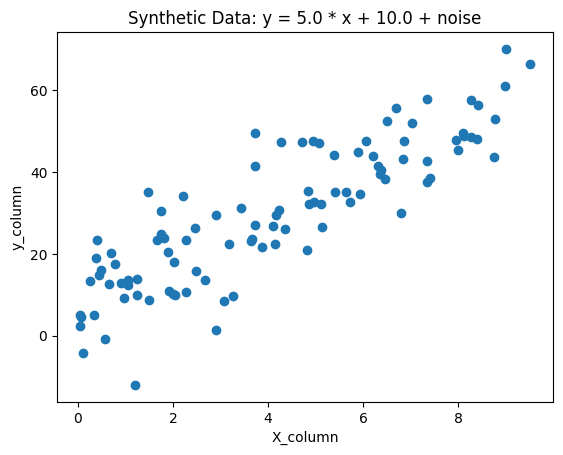

Mean Squared Error: 55.36084508070276
R² Score: 0.7375752575415464
Predicted value for X = 5: [35.38668096]


d:\ml\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to generate synthetic linear data
def generate_data(a=1, b=0, num_points=100, noise=1.0):
    """
    Generate synthetic linear data with the equation: y = a * x + b + noise
    Parameters:
        a (float): Slope of the line.
        b (float): Intercept of the line.
        num_points (int): Number of data points to generate.
        noise (float): Amount of Gaussian noise to add to the data.
    Returns:
        X (ndarray): Array of input feature values.
        y (ndarray): Array of target values (with noise).
    """
    X = np.random.rand(num_points, 1) * 10  # Generate 'num_points' random X values between 0 and 10
    y = a * X + b + np.random.randn(num_points, 1) * noise  # y = a*x + b + noise
    return X, y

# Allow user to set parameters
a = float(input("Enter the slope (a): "))
b = float(input("Enter the intercept (b): "))
num_points = int(input("Enter the number of data points: "))
noise = float(input("Enter the noise level: "))

# Generate the synthetic data
X, y = generate_data(a=a, b=b, num_points=num_points, noise=noise)

# Convert to pandas DataFrame for easier handling
data = pd.DataFrame(np.hstack([X, y]), columns=['X_column', 'y_column'])

# Step 2: Data Understanding
print(data.info())
print(data.describe())

# Visualize the generated data
plt.scatter(data['X_column'], data['y_column'])
plt.xlabel('X_column')
plt.ylabel('y_column')
plt.title(f'Synthetic Data: y = {a} * x + {b} + noise')
plt.show()

# Step 3: Data Preparation
# Split the data into features (X) and target (y)
X = data[['X_column']]  # Independent variable(s)
y = data['y_column']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Modeling
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Step 5: Evaluation
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Step 6: Deployment (example of new predictions)
new_data = np.array([[5]])  # Replace with new input value if needed
predicted_value = model.predict(new_data)
print(f"Predicted value for X = 5: {predicted_value}")
